In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong']  # 汉字字体,优先使用楷体，如果找不到楷体，则使用黑体
plt.rcParams['font.size'] = 12  # 字体大小
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

In [24]:
#从文件中导入相应的数据
data1 = pd.read_csv('e:\wine_data\winemag-data_first150k.csv')
data2 = pd.read_csv('e:\wine_data\winemag-data-130k-v2.csv')
wine = pd.concat([data1, data2], ignore_index=True, sort=False)
wine = wine.drop(labels='Unnamed: 0', axis=1)
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280901 entries, 0 to 280900
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                280833 non-null  object 
 1   description            280901 non-null  object 
 2   designation            197701 non-null  object 
 3   points                 280901 non-null  int64  
 4   price                  258210 non-null  float64
 5   province               280833 non-null  object 
 6   region_1               234594 non-null  object 
 7   region_2               111464 non-null  object 
 8   variety                280900 non-null  object 
 9   winery                 280901 non-null  object 
 10  taster_name            103727 non-null  object 
 11  taster_twitter_handle  98758 non-null   object 
 12  title                  129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 27.9+ MB


In [25]:
# 数据去重
wine.duplicated().value_counts()
wine.drop_duplicates()
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280901 entries, 0 to 280900
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                280833 non-null  object 
 1   description            280901 non-null  object 
 2   designation            197701 non-null  object 
 3   points                 280901 non-null  int64  
 4   price                  258210 non-null  float64
 5   province               280833 non-null  object 
 6   region_1               234594 non-null  object 
 7   region_2               111464 non-null  object 
 8   variety                280900 non-null  object 
 9   winery                 280901 non-null  object 
 10  taster_name            103727 non-null  object 
 11  taster_twitter_handle  98758 non-null   object 
 12  title                  129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 27.9+ MB


In [26]:
wine.head()


,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN


In [27]:
#  标称属性，给出每个可能聚会的频数
# 本数据集中的标称属性包括国家(country)、省份(province)、地区1(region_1)
# 地区2（region_2）、品种（variety）、酒厂（winery）
wine['country'].value_counts()#country

US                        116901
France                     43191
Italy                      43018
Spain                      14913
Portugal                   11013
Chile                      10288
Argentina                   9431
Australia                   7286
Austria                     6402
New Zealand                 4739
Germany                     4617
South Africa                3659
Greece                      1350
Israel                      1135
Canada                       453
Hungary                      377
Romania                      259
Bulgaria                     218
Uruguay                      201
Slovenia                     181
Croatia                      162
Turkey                       142
Mexico                       133
Moldova                      130
Georgia                      129
England                       83
Brazil                        77
Lebanon                       72
Cyprus                        42
Morocco                       40
Macedonia 

In [28]:
wine['province'].value_counts()#province

California                   80755
Washington                   18389
Tuscany                      13178
Bordeaux                     12052
Oregon                        9962
                             ...  
Ilia                             1
Ceres Plateau                    1
Urla-Thrace                      1
Hawaii                           1
Central Otago-Marlborough        1
Name: province, Length: 490, dtype: int64

In [29]:
wine['region_1'].value_counts()#region_1

Napa Valley                               10689
Columbia Valley (WA)                       9099
Russian River Valley                       6662
California                                 6091
Mendoza                                    5887
                                          ...  
Paso Robles Highlands District                1
Texoma                                        1
Maury Sec                                     1
Monterey-San Luis Obispo-Santa Barbara        1
Geographe                                     1
Name: region_1, Length: 1332, dtype: int64

In [30]:
wine['region_2'].value_counts()#region_2

Central Coast              24122
Sonoma                     20286
Columbia Valley            17260
Napa                       15615
Willamette Valley           6604
California Other            6179
Finger Lakes                3287
Sierra Foothills            3122
Napa-Sonoma                 2814
Mendocino/Lake Counties     2389
Central Valley              2177
Southern Oregon             1579
Long Island                 1451
Oregon Other                1388
North Coast                 1216
Washington Other            1127
South Coast                  470
New York Other               378
Name: region_2, dtype: int64

In [31]:
wine['winery'].value_counts()#winery

Williams Selyem          585
Testarossa               492
DFJ Vinhos               473
Chateau Ste. Michelle    419
Wines & Winemakers       391
                        ... 
Joliesse                   1
Chateau de Manissy         1
Novo Mundo                 1
Canava Argyros             1
Don Román                  1
Name: winery, Length: 19186, dtype: int64

In [32]:
wine['variety'].value_counts()#variety

Pinot Noir                  27563
Chardonnay                  26235
Cabernet Sauvignon          22272
Red Blend                   19008
Bordeaux-style Red Blend    14262
                            ...  
Malvoisie                       1
Shiraz-Roussanne                1
Cercial                         1
Paralleda                       1
Biancolella                     1
Name: variety, Length: 756, dtype: int64

In [33]:
# 数值属性，给出5数概括及缺失值的个数
#数值属性为points和price
wine.describe()

,points,price
count,280901.000000,258210.000000
mean,88.146934,34.177162
std,3.151528,38.611708
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,25.000000
75%,90.000000,40.000000
max,100.000000,3300.000000


In [34]:
# 缺失值个数统计：points的缺失值个数为0，price的缺失值个数为22691
wine.isnull().sum(axis=0)

country                      68
description                   0
designation               83200
points                        0
price                     22691
province                     68
region_1                  46307
region_2                 169437
variety                       1
winery                        0
taster_name              177174
taster_twitter_handle    182143
title                    150930
dtype: int64

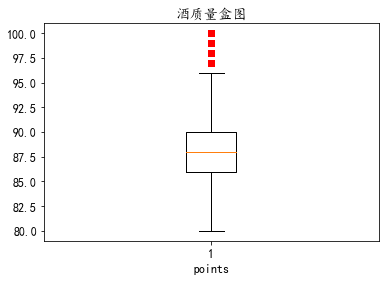

In [35]:
#数据可视化
     #使用直方图、盒图等检查数据分布及离群点
 #创建盒图
plt.boxplot(wine['points'], notch=False, sym='rs', vert=True)
plt.xlabel('points')
plt.title('酒质量盒图')
plt.show()

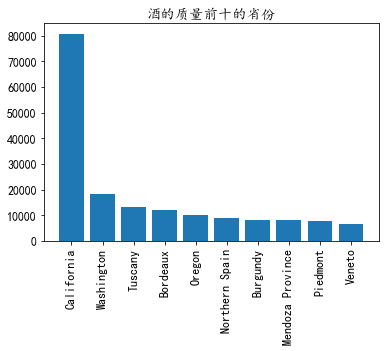

In [36]:
#创建直方图
temp = wine.province.value_counts()[:10]
country_temp = temp.index
points = [temp[i] for i in range(10)]
plt.bar(country_temp, points)
plt.xticks(rotation=90)
plt.title('酒的质量前十的省份')
plt.show()

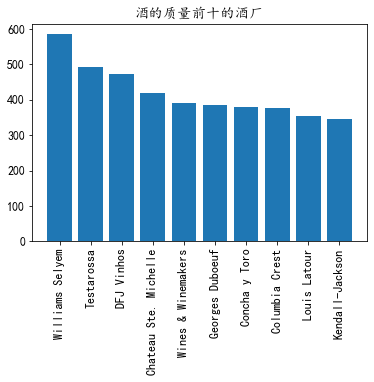

In [37]:
#数据可视化：直方图
temp = wine.winery.value_counts()[:10]
country_temp = temp.index
points = [temp[i] for i in range(10)]
plt.bar(country_temp, points)
plt.xticks(rotation=90)
plt.title('酒的质量前十的酒厂')
plt.show()

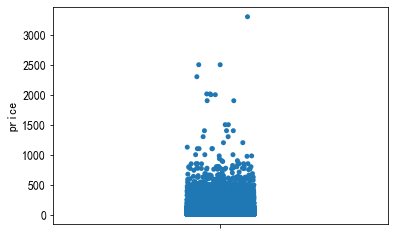

In [38]:
#酒价格
import seaborn as sns
sns.stripplot(y='price', data=wine)
plt.show()

In [63]:
def scatter_plot(df,xlabel=None,ylabel=None,new_df=None):#创建散点图
    if xlabel is None or ylabel is None:
        print("Please provide xlabel and ylabel")
        return None
    if new_df is None:
        plt.figure()
        plt.title('Scatter plot')
        sns.scatterplot(x=xlabel,y=ylabel,data=df)
    else:
        plt.figure(figsize=(14,8))
        plt.subplot(121)
        plt.title('Scatter plot')
        sns.scatterplot(x=xlabel,y=ylabel,data=df)

        plt.subplot(122)
        plt.title('new Scatter plot')
        sns.scatterplot(x=xlabel,y=ylabel,data=new_df)
def hist_plot(df,ylabel=None,bins=10,new_df=None):
    if ylabel is None:
        print("Please provide ylabel")
        return None
    if new_df is None:
        plt.figure()
        plt.title('Histogram')
        sns.distplot(a=df[ylabel].dropna(),bins=bins,hist=True,kde=False)
    else:
        plt.figure(figsize=(14,8))
        plt.subplot(121)
        plt.title('Histogram')
        sns.distplot(a=df[ylabel].dropna(),bins=bins,hist=True,kde=False)

        plt.subplot(122)
        plt.title('new_Histogram')
        sns.distplot(a=new_df[ylabel].dropna(),bins=bins,hist=True,kde=False)
def viz_pairs(df,ylabel=None,xlabel=None,bins=20,new_df=None):
    if ylabel is None or xlabel is None:
        print("Please provide xlabel and ylabel")
        return None
    scatter_plot(df,xlabel=xlabel,ylabel=ylabel,new_df=new_df)
    

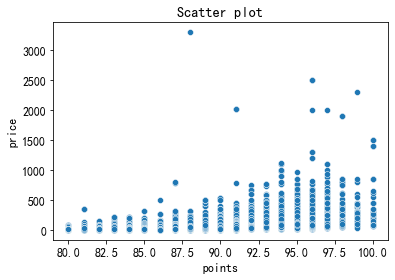

In [64]:
viz_pairs(wine,xlabel='points',ylabel='price',bins=20,new_df=None)

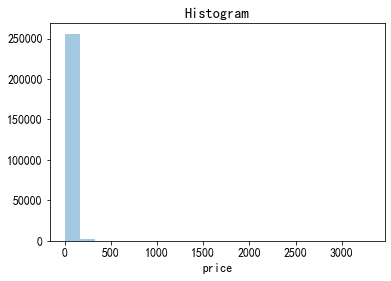

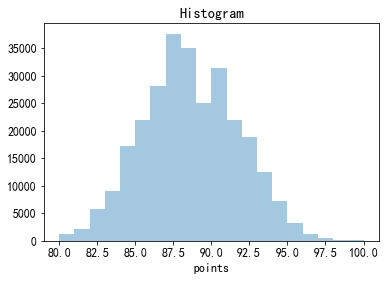

In [68]:
    hist_plot(wine,ylabel='price',bins=20,new_df=None)
    hist_plot(wine,ylabel='points',bins=20,new_df=None)

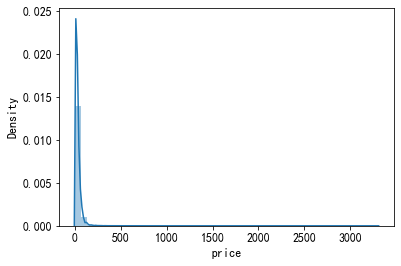

In [69]:
# 酒价格分布
# 大部分酒的价格在0-200之间
sns.distplot(wine.price.dropna())
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Grüner Veltliner'),
  Text(1, 0, 'Chardonnay'),
  Text(2, 0, 'Chardonnay'),
  Text(3, 0, 'Bordeaux-style Red Blend'),
  Text(4, 0, 'Bordeaux-style Red Blend'),
  Text(5, 0, 'Bordeaux-style Red Blend'),
  Text(6, 0, 'Bordeaux-style Red Blend'),
  Text(7, 0, 'Bordeaux-style Red Blend'),
  Text(8, 0, 'Bordeaux-style White Blend'),
  Text(9, 0, 'Chardonnay'),
  Text(10, 0, 'Chardonnay'),
  Text(11, 0, 'Bordeaux-style Red Blend'),
  Text(12, 0, 'Bordeaux-style Red Blend'),
  Text(13, 0, 'Bordeaux-style Red Blend'),
  Text(14, 0, 'Bordeaux-style Red Blend'),
  Text(15, 0, 'Bordeaux-style Red Blend'),
  Text(16, 0, 'Port'),
  Text(17, 0, 'Bordeaux-style Red Blend'),
  Text(18, 0, 'Bordeaux-style White Blend'),
  Text(19, 0, 'Bordeaux-style Red Blend'),
  Text(20, 0, 'Grüner Veltliner'),
  Text(21, 0, 'Pinot Noir'),
  Text(22, 0, 'Bordeaux-style Red Blend'

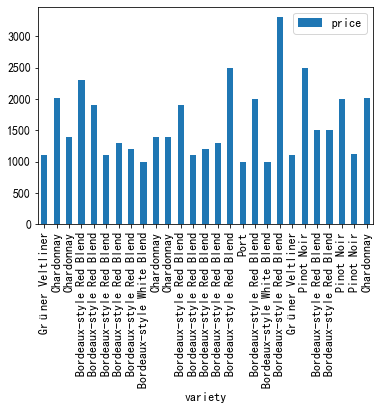

In [70]:
# 统计高价格酒
high_price = wine[wine.price>=1000][['country', 'province', 'designation', 'points', 'price', 'variety']]
high_price.plot(kind='bar', x='variety', y='price')
plt.xticks(rotation=90)

In [71]:
#3.2 数据缺失的处理
#观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:
#将缺失部分剔除
#用最高频率值来填补缺失值
#通过属性的相关关系来填补缺失值
#通过数据对象之间的相似性来填补缺失值
def show_null(series):
      data = series.value_counts()
      name = data.index[:10]
      counts = [data[name[i]] for i in range(10)]
      dict_ = {}
      for i in range(10):
         dict_[name[i]] = counts[i]
      frequence = [counts[i]/sum(counts) for i in range(10)]
      df = pd.DataFrame(counts, index=name, columns=['count'])
      df['freq'] = frequence
      print(df)

In [76]:
#缺失值处理
#方法1：将缺失值剔除
wine_country = wine.dropna(axis=0,inplace=False)

In [148]:
def nominal_summary_1(df,nominal_index=None,head_n=50,new_df=None):
    # 根据频数绘制直方图
    def bar_describe(data,new_data=None,head_n=50):
        if new_data is None:
            plt.figure(figsize=(24,8))
            plt.title(data.name, fontsize=30)    
            plt.bar(data.index[:head_n], data.values[:head_n])
            plt.xticks(rotation=90)
            plt.show()
            
        else:
            plt.figure(figsize=(24,8))
            #plt.subplot(211)
            plt.title(data.name, fontsize=30)    
            plt.bar(data.index[:head_n], data.values[:head_n],color='g',label=data.name)
            #plt.xticks(rotation=90)
            
            #plt.figure(figsize=(24,8))
            #plt.subplot(212)
            #plt.title('new_'+new_data.name,fontsize=30)
            plt.bar(new_data.index[:head_n],new_data.values[:head_n],color='r',label='new_'+new_data.name)
            plt.xticks(rotation=90)
            plt.legend()
            plt.show()
            
    # 获取数据中每个取值的频数
    frequency = {key: df[key].value_counts() for key in df.columns}
    new_frequency = None
    if new_df is not None:
        new_frequency = {key: new_df[key].value_counts() for key in new_df.columns}
        
    if nominal_index is None:
        nominal_index=df.columns
    if new_frequency is None:
        for key in nominal_index:
            bar_describe(data=frequency[key],new_data=None,head_n=head_n)
    else:
        for key in nominal_index:
            bar_describe(data=frequency[key],new_data=new_frequency[key],head_n=head_n)
    return None

# 数值属性缺失值个数及五数概括
def numerical_summary(df,numerical_index=None,new_df=None):
    shape=df.shape # 样本总数
    # 格式化输出五数概括和缺失值个数
    def data_describe(data,new_data=None):
        print('descriptive statistics (%s):' % data.name)
        info=data.describe()
        new_info = None
        if new_data is not None:
            new_info = new_data.describe()
            
        print("Min: {:.4f}\tQ1(25%): {:.4f} \tQ2(50%): {:.4f} \tQ3(75%): {:.4f} \tMax: {:.4f}".format(
            info['min'],info['25%'],info['50%'],info['75%'],info['max']))
        print("Missing: {:d}".format(int(shape[0] - info['count'])))
        print()
        
        if new_info is not None:
            print("\033[95m new Min: {:.4f}\tQ1(25%): {:.4f} \tQ2(50%): {:.4f} \tQ3(75%): {:.4f} \tMax: {:.4f} \033[0m".format(
            new_info['min'],new_info['25%'],new_info['50%'],new_info['75%'],new_info['max']))
            print("\033[95m new Missing: {:d} \033[0m".format(int(shape[0] - new_info['count'])))
            print()
        
    if numerical_index is None:
        print("Please provide the numerical index needed to be describe")
        return None
    
    # 获取数值属性的5数概况和缺失值个数
    if new_df is None:
        for key in numerical_index:
            data_describe(df[key])
    else:
        for key in numerical_index:
            data_describe(df[key],new_df[key])
    
    return None

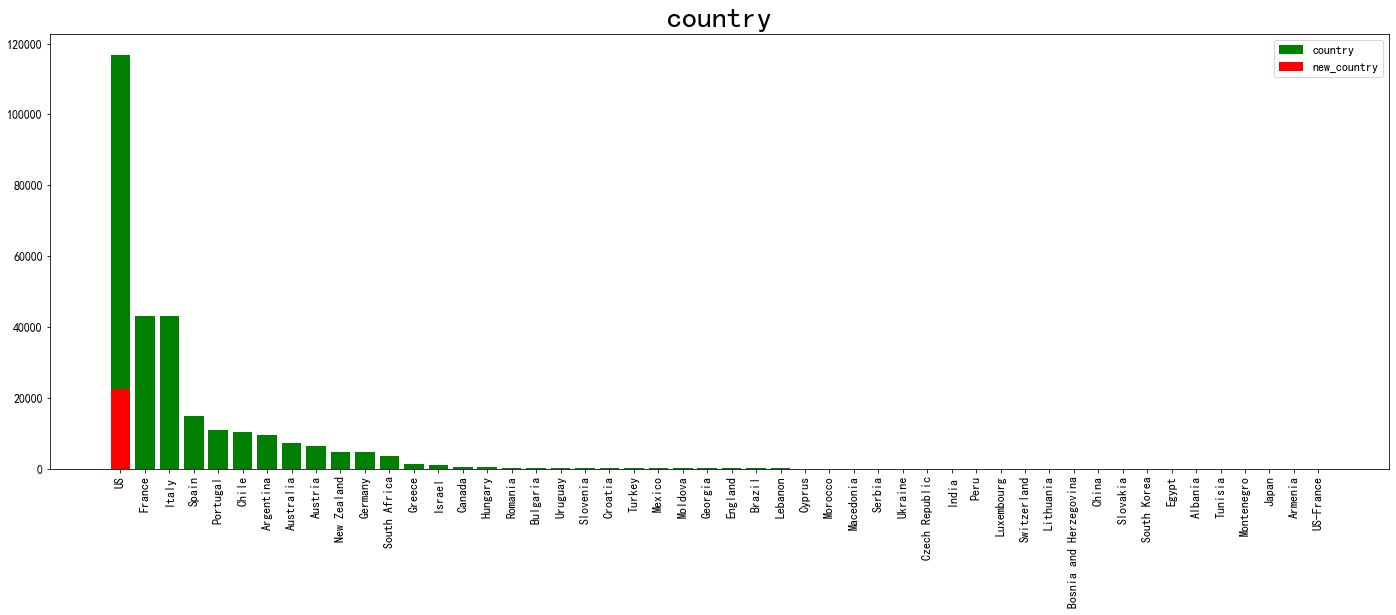

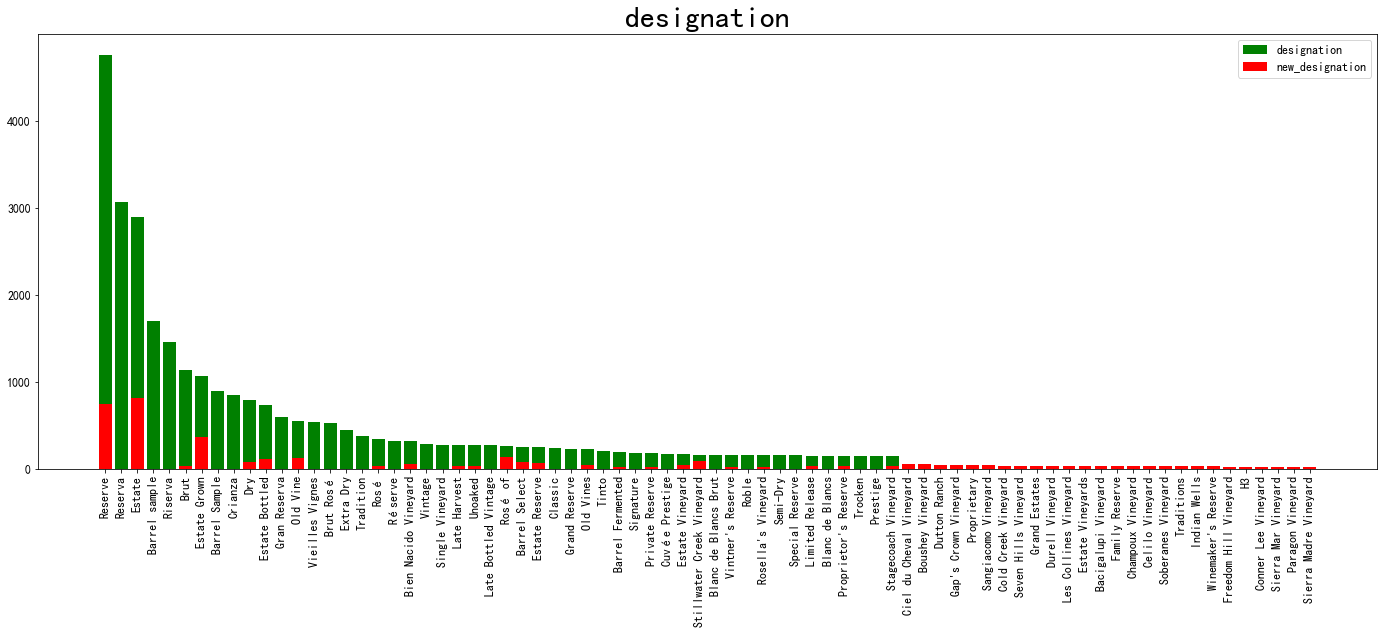

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 244 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 246 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 244 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 246 missing from current font.
  font.set_text(s, 0, flags=flags)


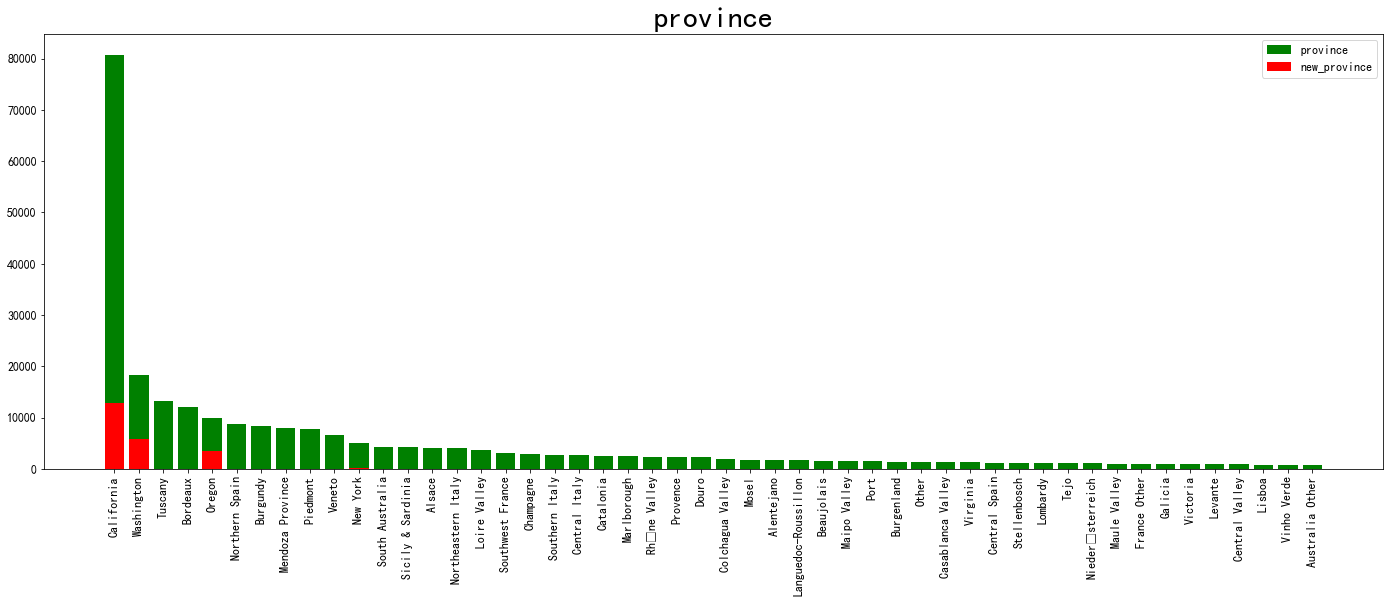

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 201 missing from current font.
  font.set_text(s, 0, flags=flags)


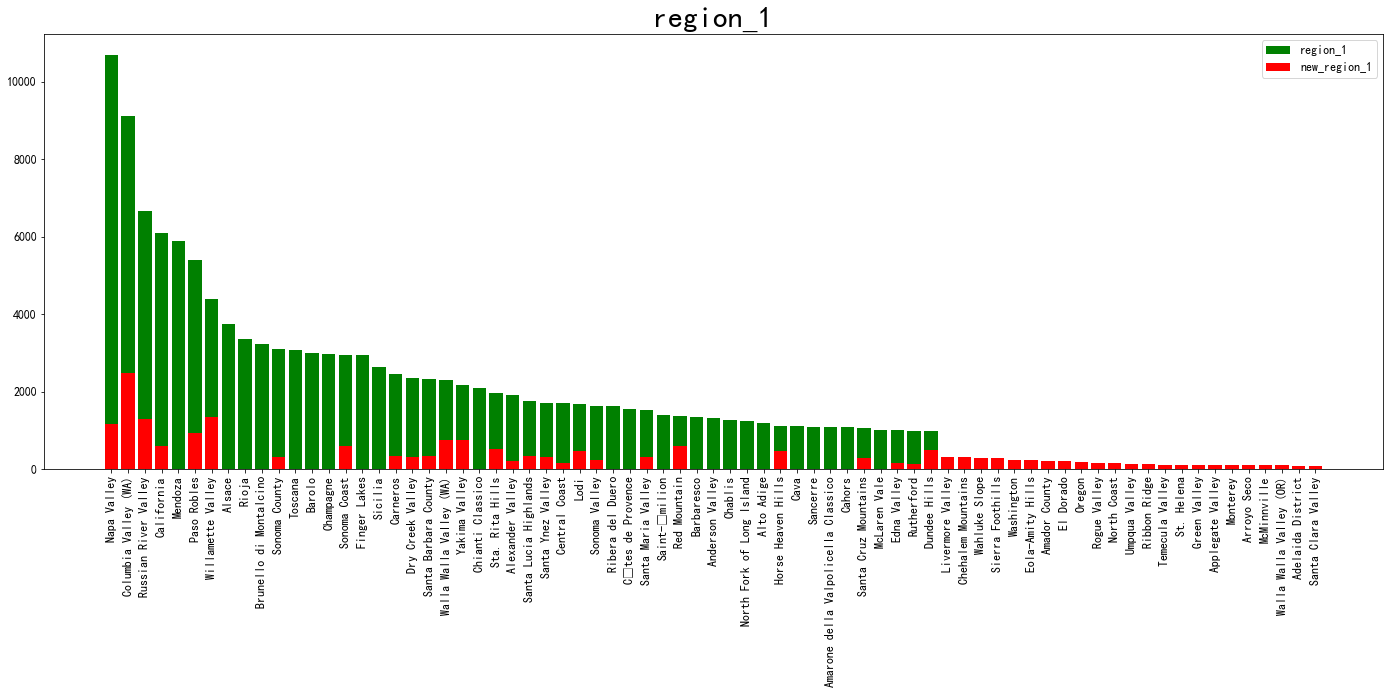

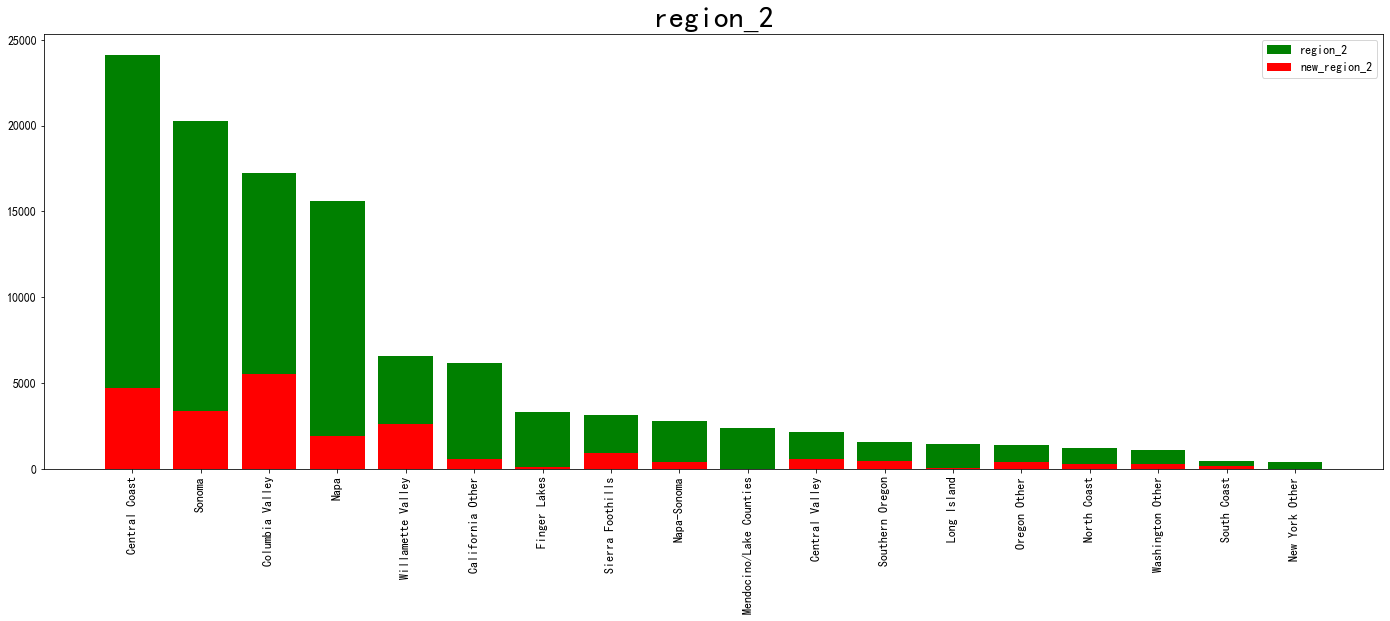

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 241 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 241 missing from current font.
  font.set_text(s, 0, flags=flags)


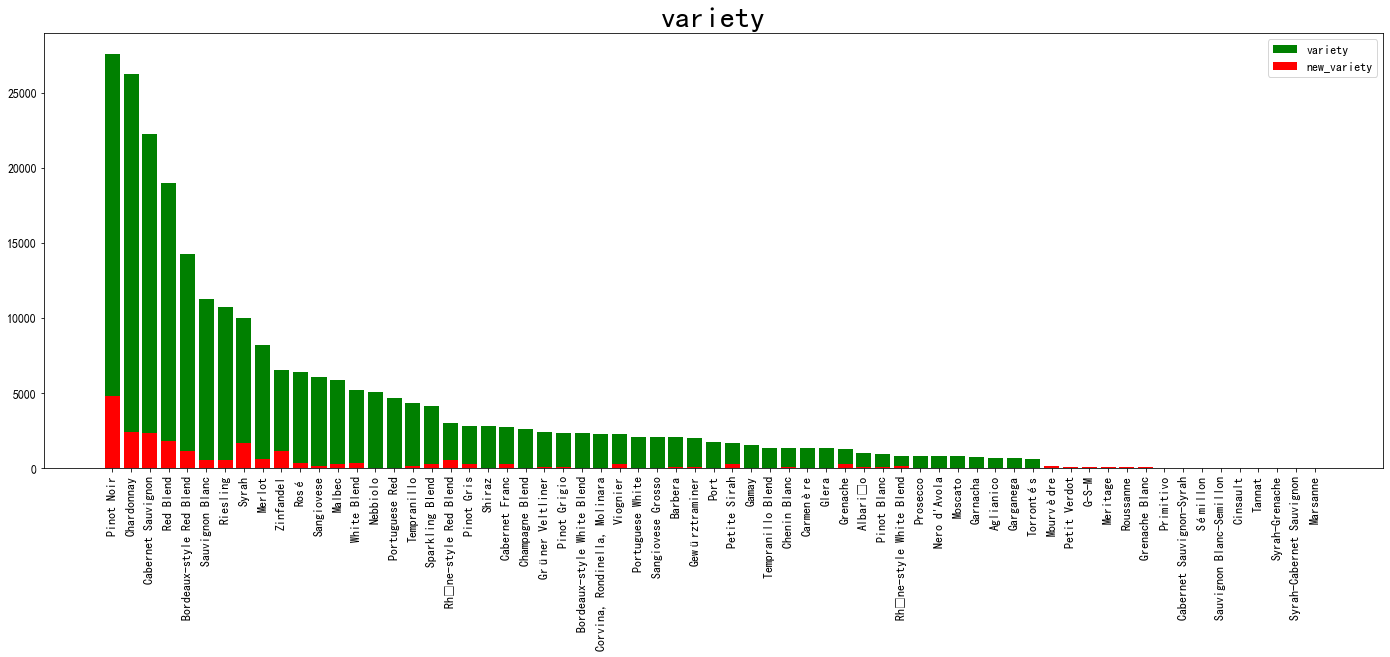

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 227 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 227 missing from current font.
  font.set_text(s, 0, flags=flags)


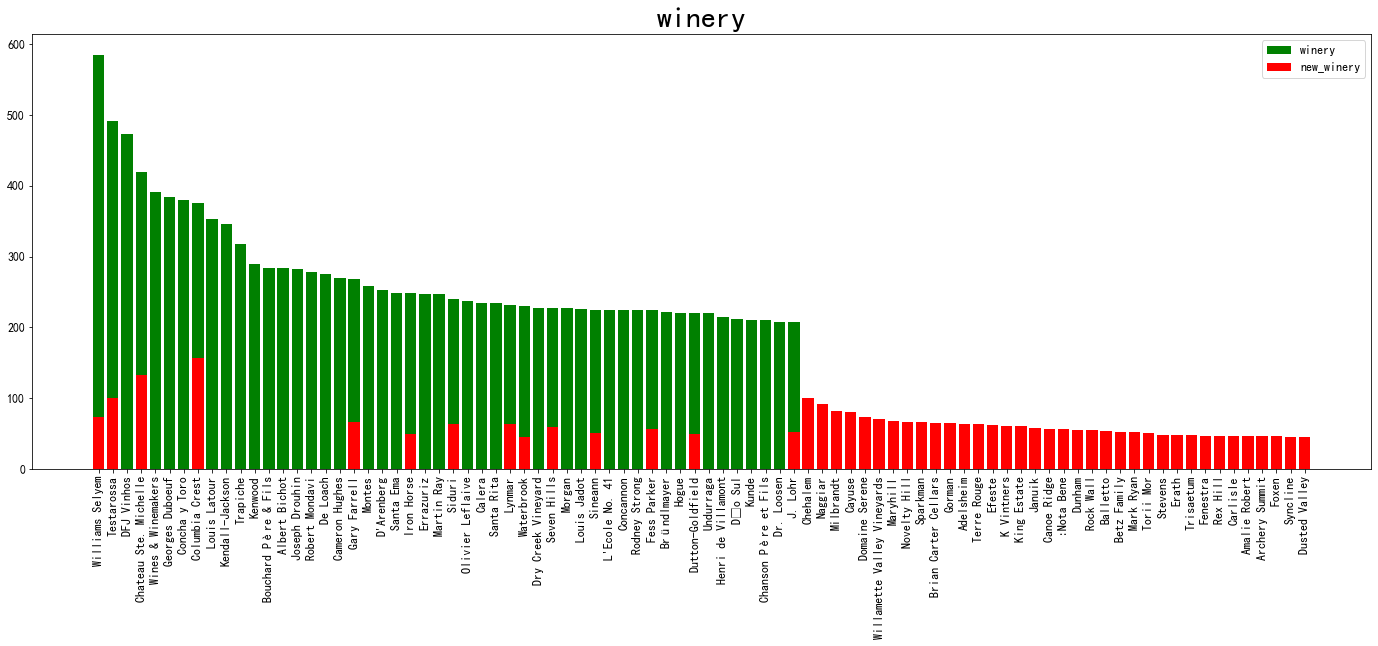

descriptive statistics (points):
Min: 80.0000	Q1(25%): 86.0000 	Q2(50%): 88.0000 	Q3(75%): 90.0000 	Max: 100.0000
Missing: 0

 new Min: 80.0000	Q1(25%): 88.0000 	Q2(50%): 90.0000 	Q3(75%): 92.0000 	Max: 100.0000 
 new Missing: 258514 

descriptive statistics (price):
Min: 4.0000	Q1(25%): 16.0000 	Q2(50%): 25.0000 	Q3(75%): 40.0000 	Max: 3300.0000
Missing: 22691

 new Min: 4.0000	Q1(25%): 25.0000 	Q2(50%): 36.0000 	Q3(75%): 50.0000 	Max: 2013.0000 
 new Missing: 258514 



In [149]:
wine1=wine.dropna(axis=0,inplace=False)
nominal_index = ['country', 'designation', 'province', 'region_1', 'region_2', 'variety', 'winery']
# Numerical index
numerical_index = ['points', 'price']
nominal_summary_1(wine,nominal_index=nominal_index,head_n=50,new_df=wine1)
numerical_summary(wine,numerical_index=numerical_index,new_df=wine1)


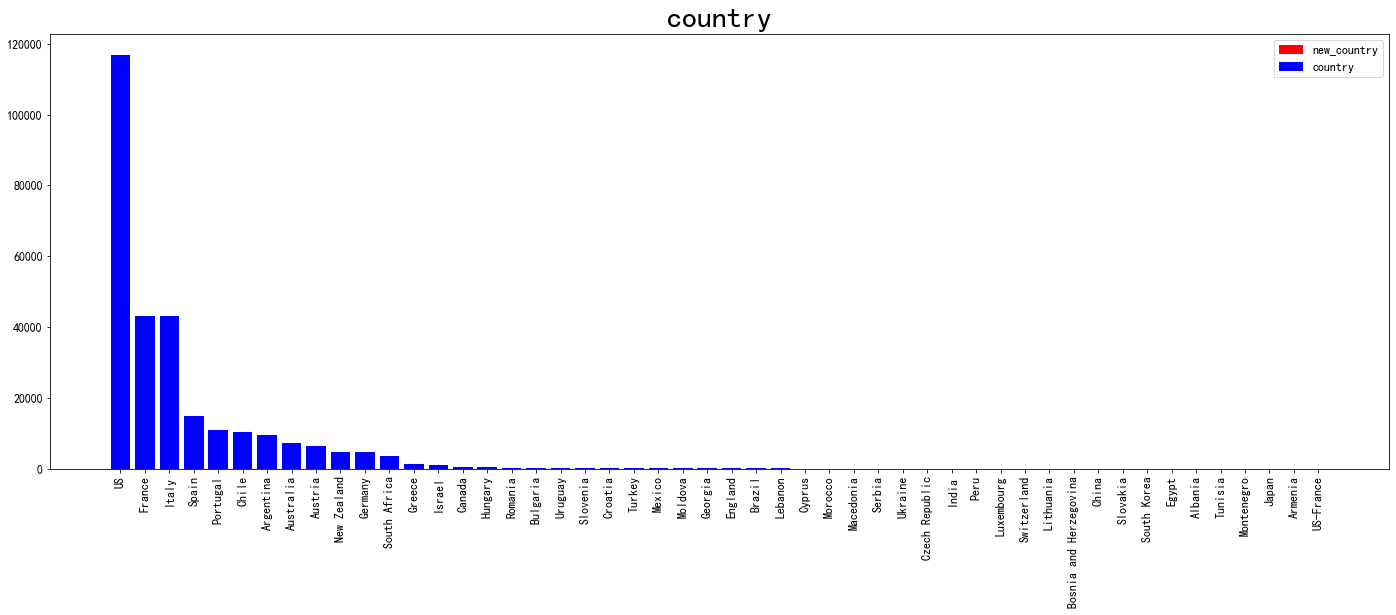

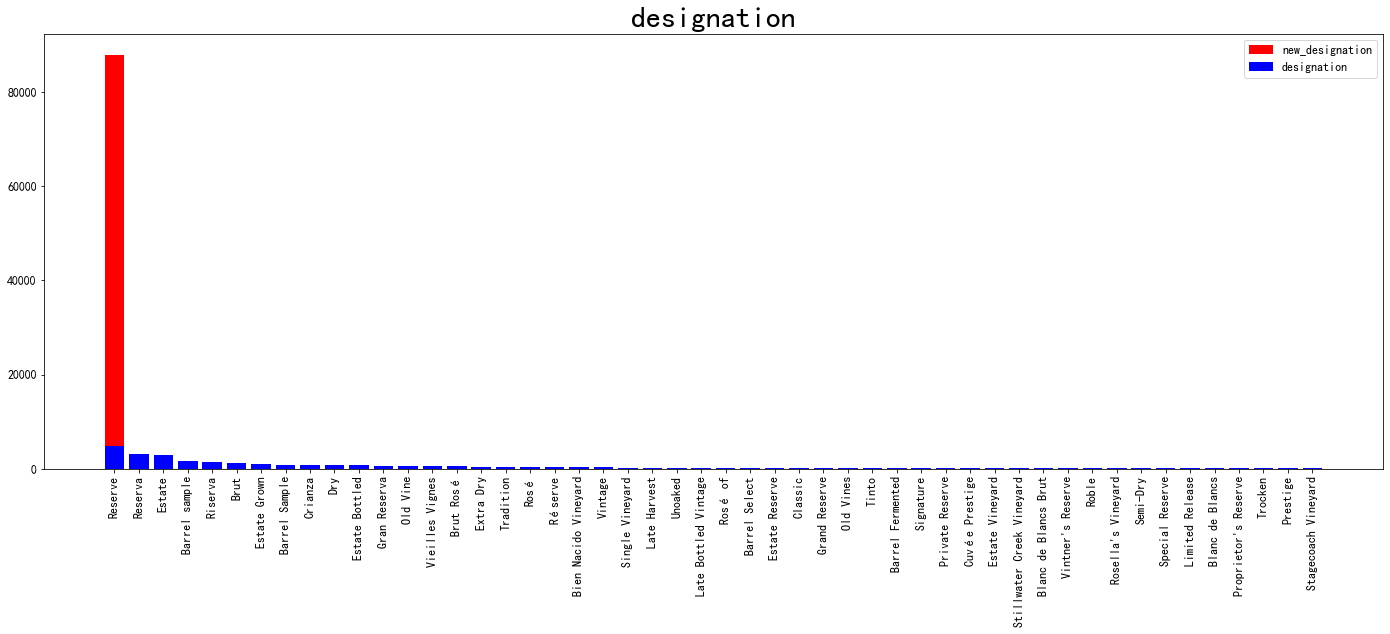

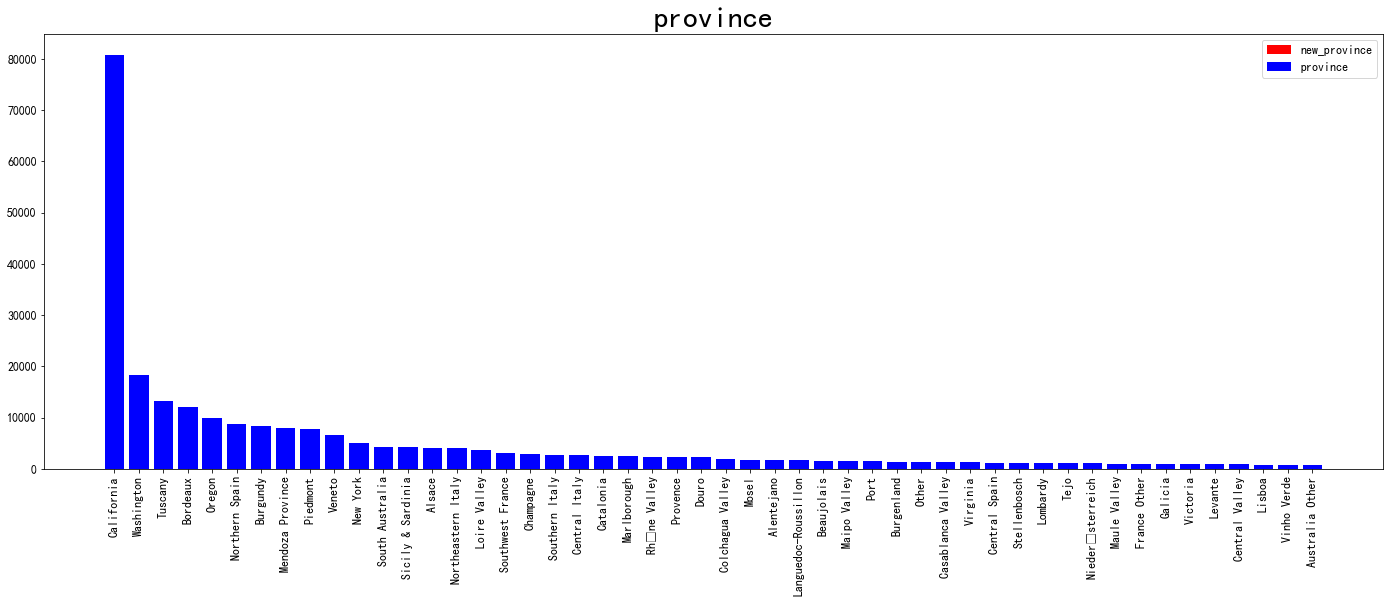

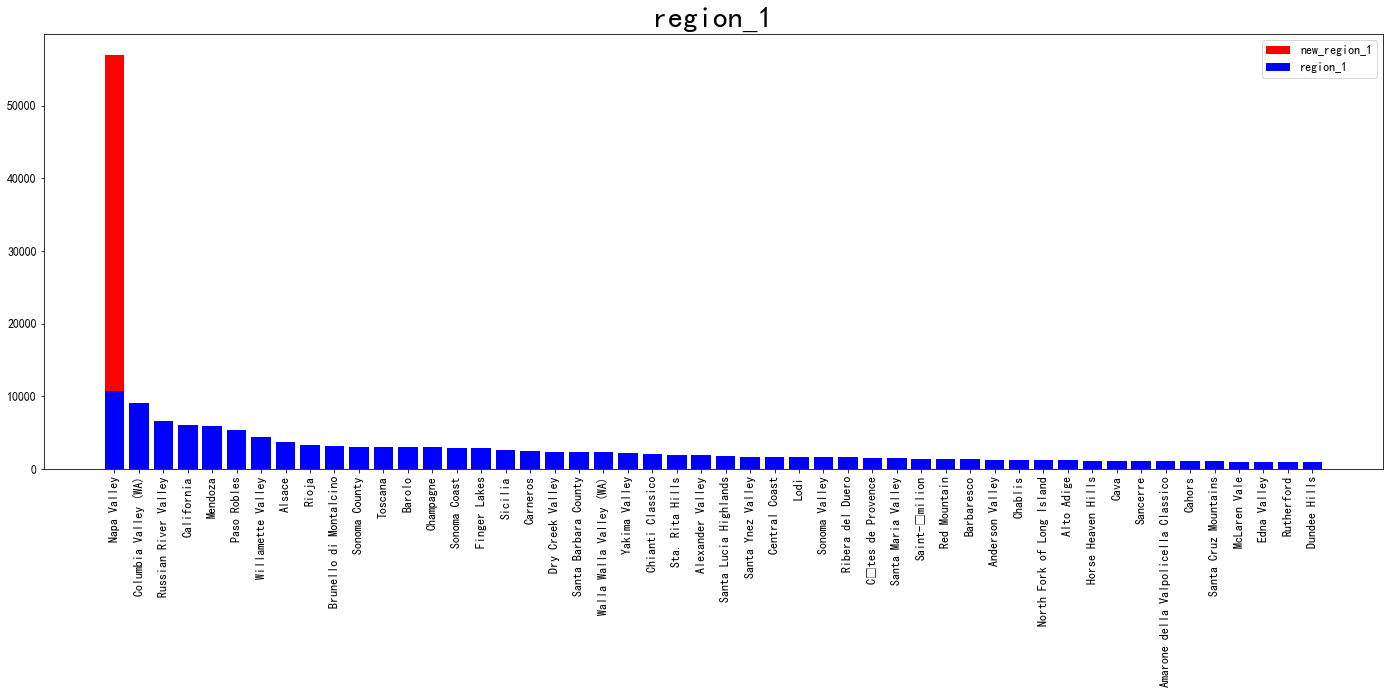

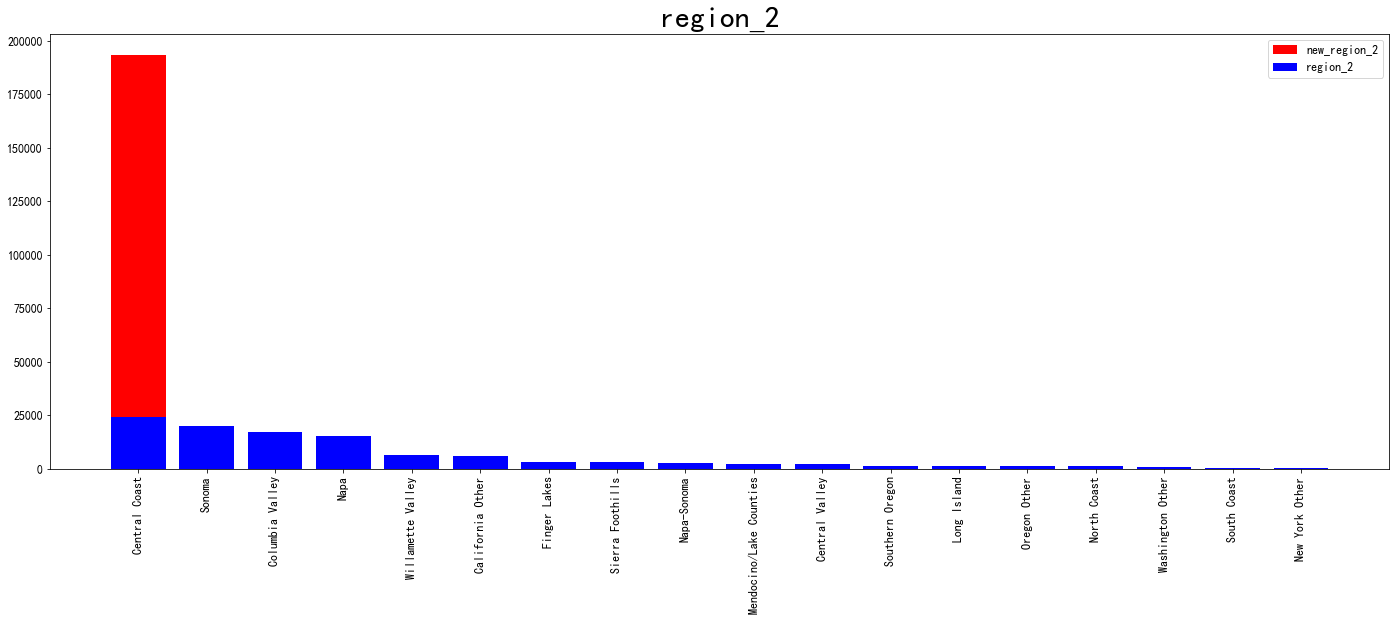

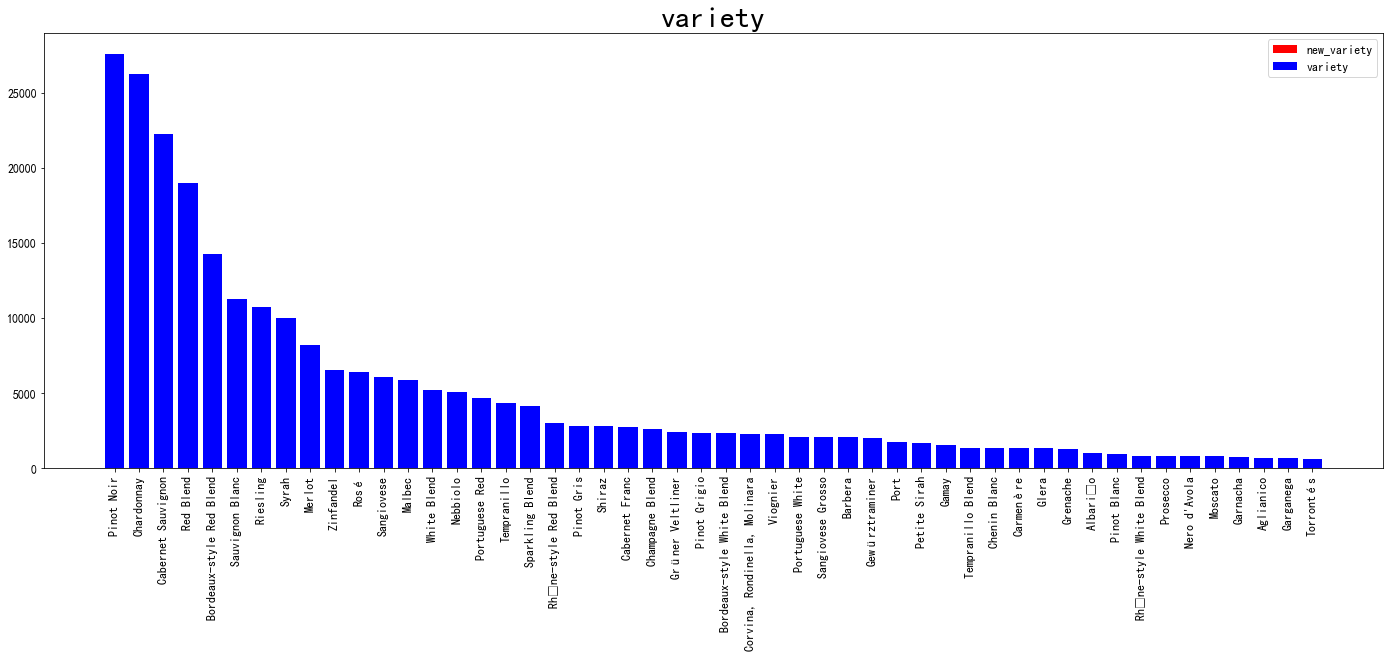

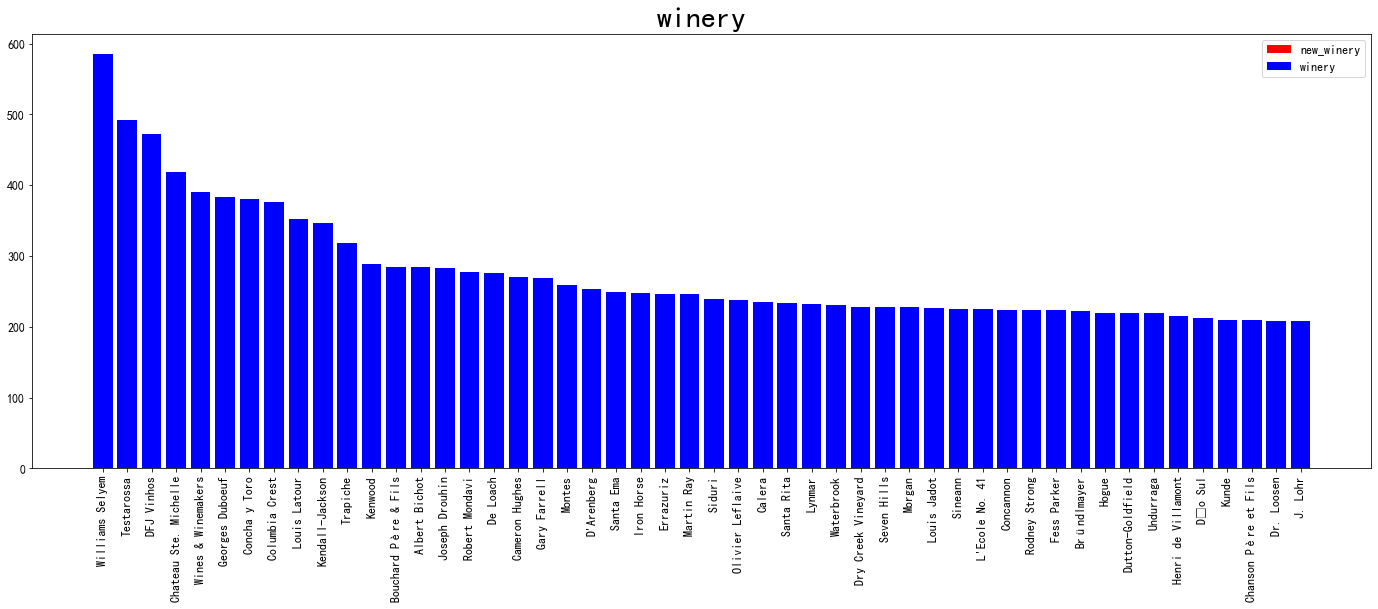

descriptive statistics (points):
Min: 80.0000	Q1(25%): 86.0000 	Q2(50%): 88.0000 	Q3(75%): 90.0000 	Max: 100.0000
Missing: 0

 new Min: 80.0000	Q1(25%): 86.0000 	Q2(50%): 88.0000 	Q3(75%): 90.0000 	Max: 100.0000 
 new Missing: 0 

descriptive statistics (price):
Min: 4.0000	Q1(25%): 16.0000 	Q2(50%): 25.0000 	Q3(75%): 40.0000 	Max: 3300.0000
Missing: 22691

 new Min: 4.0000	Q1(25%): 17.0000 	Q2(50%): 23.0000 	Q3(75%): 40.0000 	Max: 3300.0000 
 new Missing: 0 



In [150]:
#2.用最高频率值来填补缺失值
def nominal_summary(df,nominal_index=None,head_n=50,new_df=None):
    # 根据频数绘制直方图
    def bar_describe(data,new_data=None,head_n=50):
        if new_data is None:
            plt.figure(figsize=(24,8))
            plt.title(data.name, fontsize=30)    
            plt.bar(data.index[:head_n], data.values[:head_n])
            plt.xticks(rotation=90)
            plt.show()
            
        else:
            plt.figure(figsize=(24,8))
            #plt.subplot(211)
            plt.title(data.name, fontsize=30)    
           
            #plt.xticks(rotation=90)
            
            #plt.figure(figsize=(24,8))
            #plt.subplot(212)
            #plt.title('new_'+new_data.name,fontsize=30)
            plt.bar(new_data.index[:head_n],new_data.values[:head_n],color='r',label='new_'+new_data.name) 
            plt.bar(data.index[:head_n], data.values[:head_n],color='b',label=data.name)
            plt.xticks(rotation=90)
            plt.legend()
            plt.show()
            
    # 获取数据中每个取值的频数
    frequency = {key: df[key].value_counts() for key in df.columns}
    new_frequency = None
    if new_df is not None:
        new_frequency = {key: new_df[key].value_counts() for key in new_df.columns}
        
    if nominal_index is None:
        nominal_index=df.columns
    if new_frequency is None:
        for key in nominal_index:
            bar_describe(data=frequency[key],new_data=None,head_n=head_n)
    else:
        for key in nominal_index:
            bar_describe(data=frequency[key],new_data=new_frequency[key],head_n=head_n)
    return None

# 数值属性缺失值个数及五数概括
def numerical_summary(df,numerical_index=None,new_df=None):
    shape=df.shape # 样本总数
    # 格式化输出五数概括和缺失值个数
    def data_describe(data,new_data=None):
        print('descriptive statistics (%s):' % data.name)
        info=data.describe()
        new_info = None
        if new_data is not None:
            new_info = new_data.describe()
            
        print("Min: {:.4f}\tQ1(25%): {:.4f} \tQ2(50%): {:.4f} \tQ3(75%): {:.4f} \tMax: {:.4f}".format(
            info['min'],info['25%'],info['50%'],info['75%'],info['max']))
        print("Missing: {:d}".format(int(shape[0] - info['count'])))
        print()
        
        if new_info is not None:
            print("\033[95m new Min: {:.4f}\tQ1(25%): {:.4f} \tQ2(50%): {:.4f} \tQ3(75%): {:.4f} \tMax: {:.4f} \033[0m".format(
            new_info['min'],new_info['25%'],new_info['50%'],new_info['75%'],new_info['max']))
            print("\033[95m new Missing: {:d} \033[0m".format(int(shape[0] - new_info['count'])))
            print()
        
    if numerical_index is None:
        print("Please provide the numerical index needed to be describe")
        return None
    
    # 获取数值属性的5数概况和缺失值个数
    if new_df is None:
        for key in numerical_index:
            data_describe(df[key])
    else:
        for key in numerical_index:
            data_describe(df[key],new_df[key])
    
    return None
cpdf = wine.copy(deep=True)
for key in cpdf.columns:
    cpdf[key].fillna(cpdf[key].mode()[0],inplace=True)
nominal_summary(wine,nominal_index=nominal_index,head_n=50,new_df=cpdf)
numerical_summary(wine,numerical_index=numerical_index,new_df=cpdf)

In [151]:
#3.通过属性的相关关系来填补缺失值
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
def attr_corr_fill(df,miss_index,complete_index):
  def set_miss_values(df, complete_index):
    enc_label = OrdinalEncoder()
    enc_fea = OrdinalEncoder()
    missing_index = complete_index[0]
    
    # Take out the existing numerical data (no NaN) and throw them in Random Forest Regressor
    train_df = df[complete_index]
    # known & unknow values
    known_values = np.array(train_df[train_df[missing_index].notnull()])
    unknow_values = np.array(train_df[train_df[missing_index].isnull()])
    
    # y is the know missing_index
    y = known_values[:, 0].reshape(-1, 1)
    enc_label.fit(y)
    y = enc_label.transform(y)
    
    # X are the features
    X = known_values[:, 1:]
    test_X = unknow_values[:, 1:]
    all_X = np.row_stack((X,test_X))
    enc_fea.fit(all_X)
    X = enc_fea.transform(X)
    
    # fit
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y.ravel())
    # predict
    predicted_values = rfr.predict(enc_fea.transform(unknow_values[:, 1:]))
    predicted_values = enc_label.inverse_transform(predicted_values.reshape(-1, 1))
    # fill in with predicted values
    df.loc[ (df[missing_index].isnull()), missing_index] = predicted_values
    return df
  
  cpdf = df.copy(deep=True)
  for i in range(0,len(miss_index)):
    complete_index.insert(0,miss_index[i])
    cpdf = set_miss_values(cpdf,complete_index)
  return cpdf

In [2]:
from impyute.imputation.cs import fast_knn
import sys
#通过数据对象之间的相似性来填补缺失值
def obj_corr_fill(df,numerical_index,k=30):
  sys.setrecursionlimit(100000) #Increase the recursion limit of the OS
  # start the KNN training
  cpdf = df.copy(deep=True)
  imputed_training=fast_knn(cpdf[numerical_index].values, k=k)
  imputed_training=pd.DataFrame(data=imputed_training,columns=numerical_index)
  cpdf[numerical_index] = imputed_training[numerical_index]
  return cpdf

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\impyute\imputation\cs\fast_knn.py:113: RuntimeWarning: invalid value encountered in true_divide
  weights = distances/np.sum(distances)


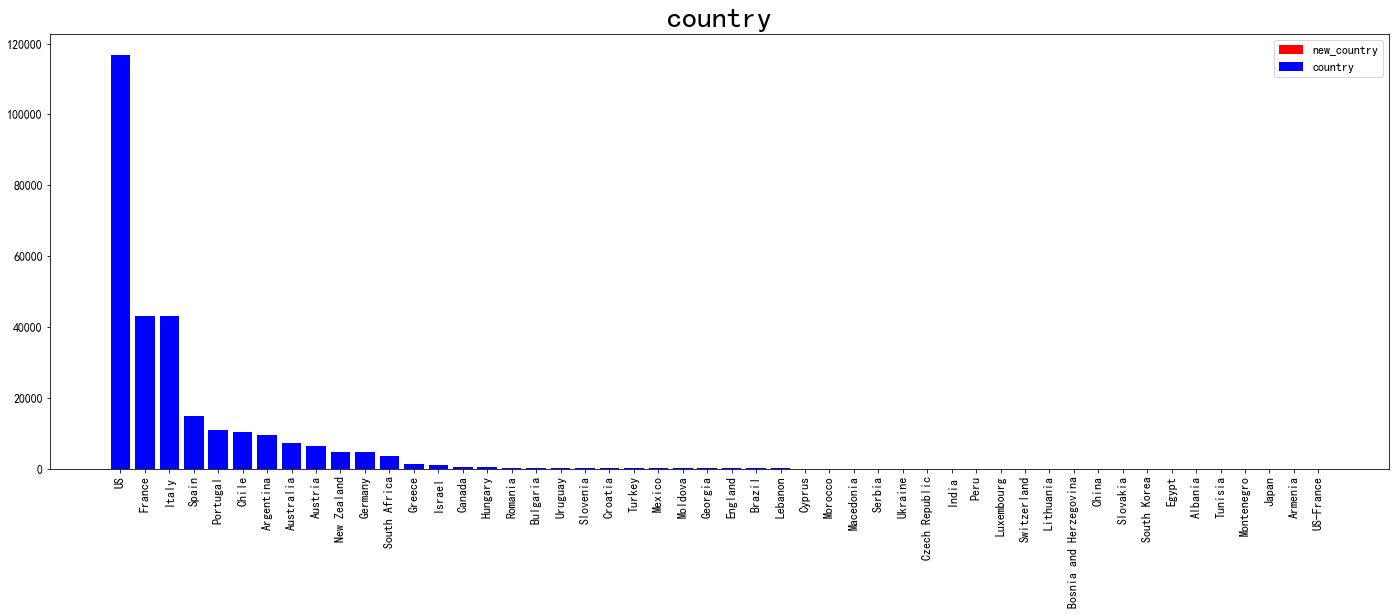

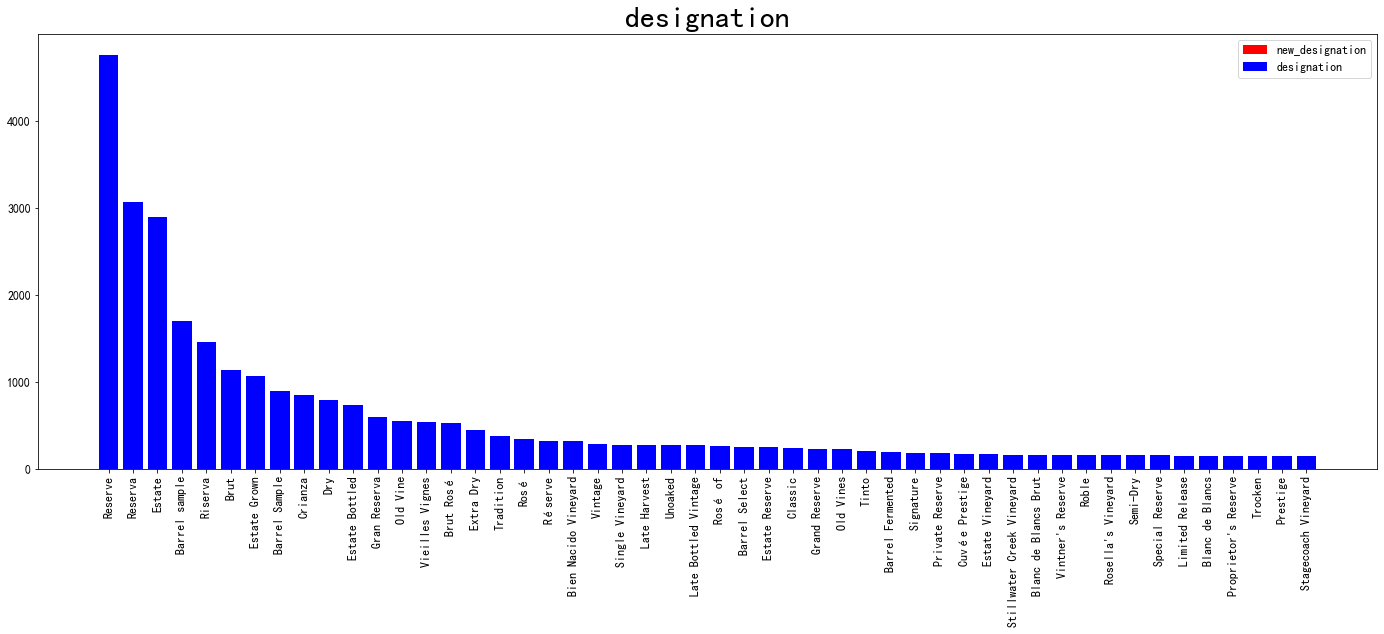

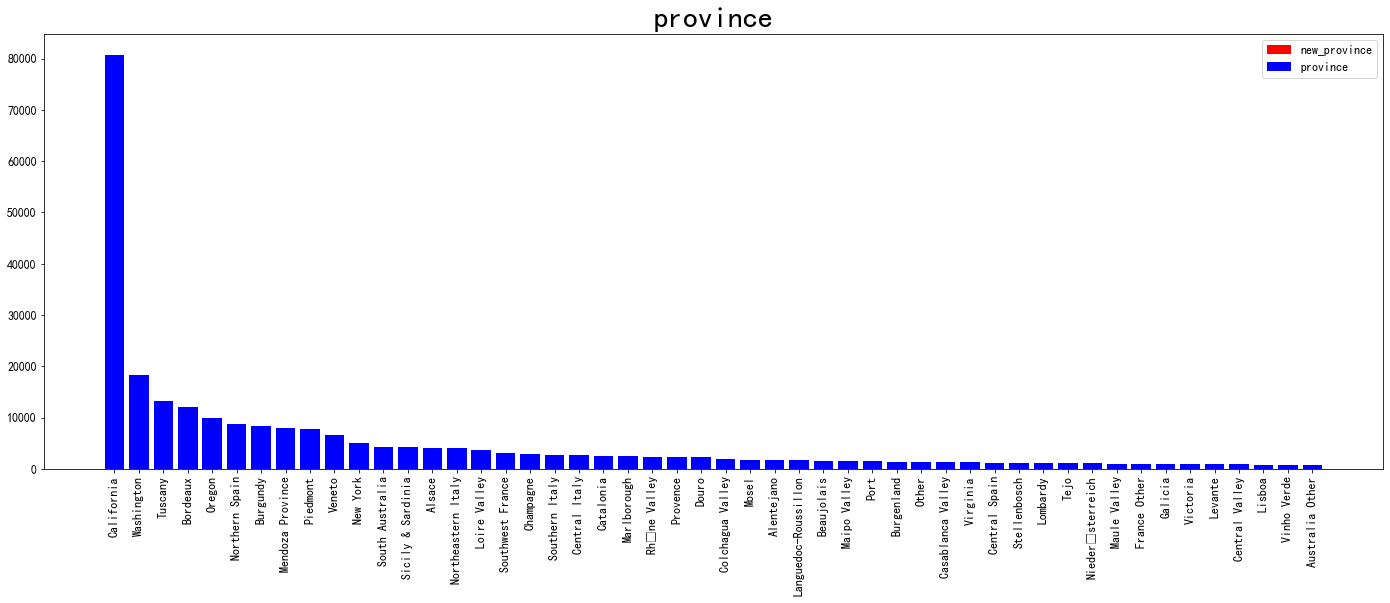

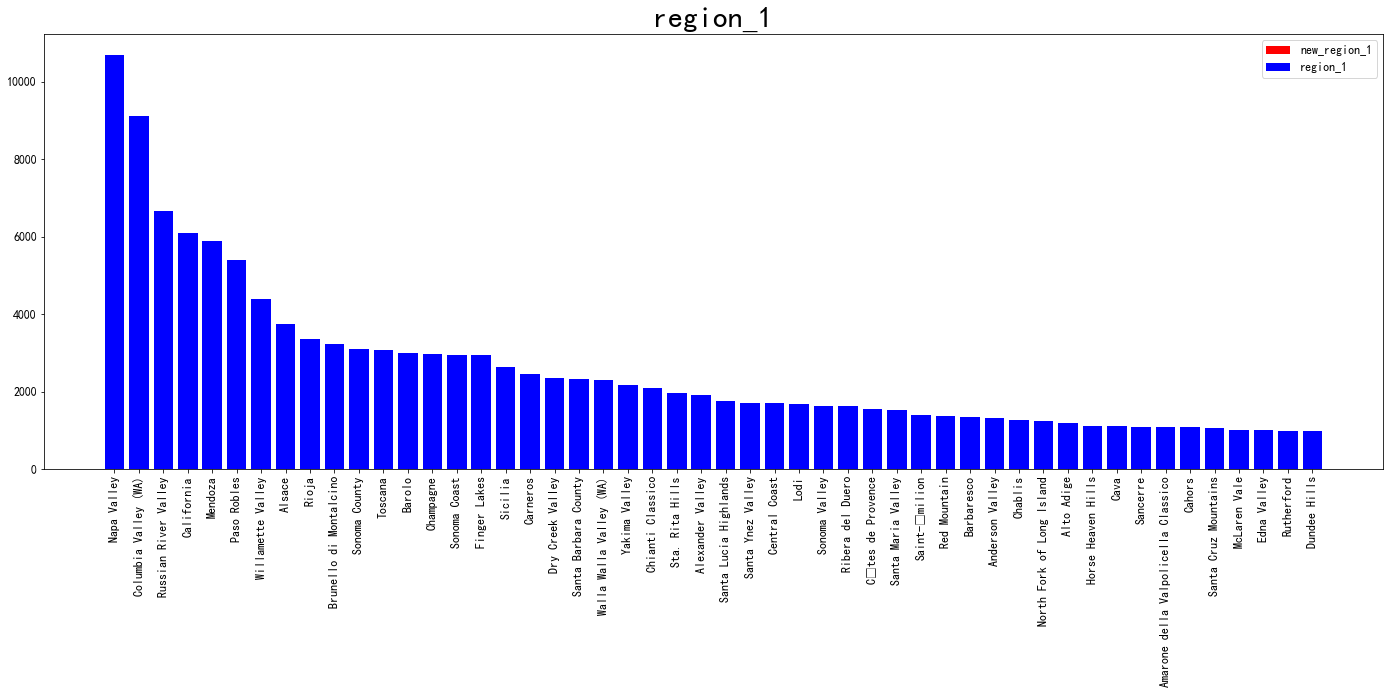

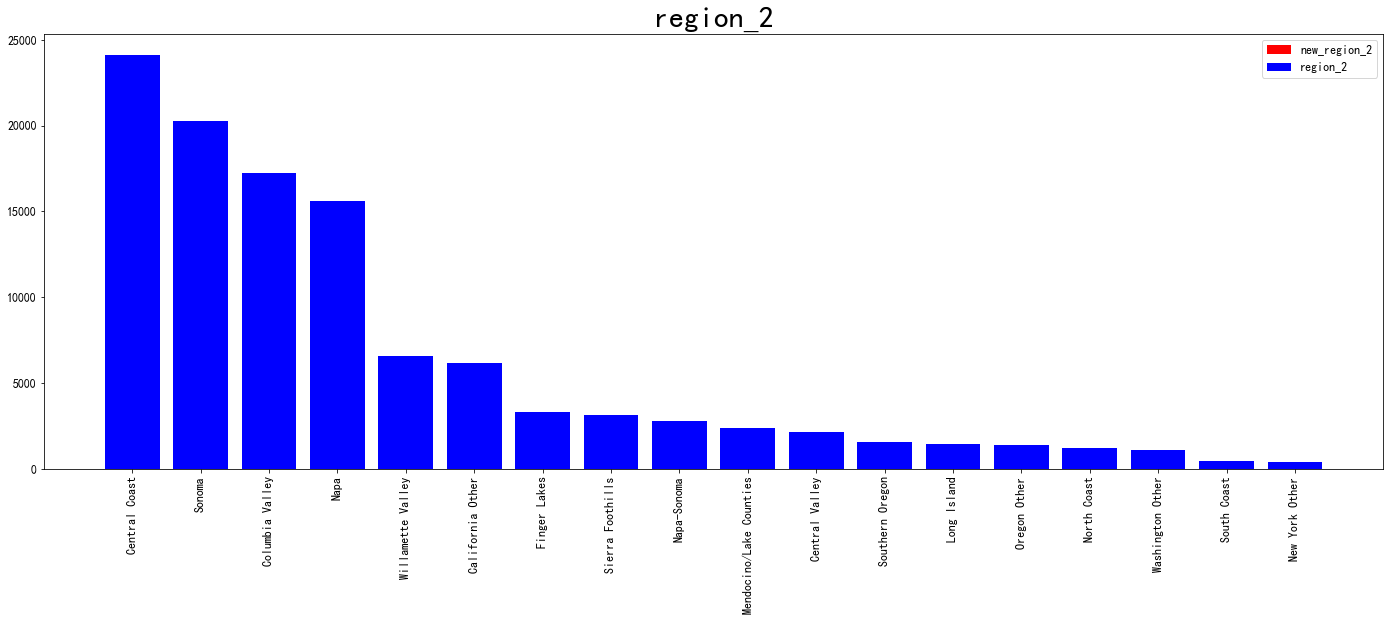

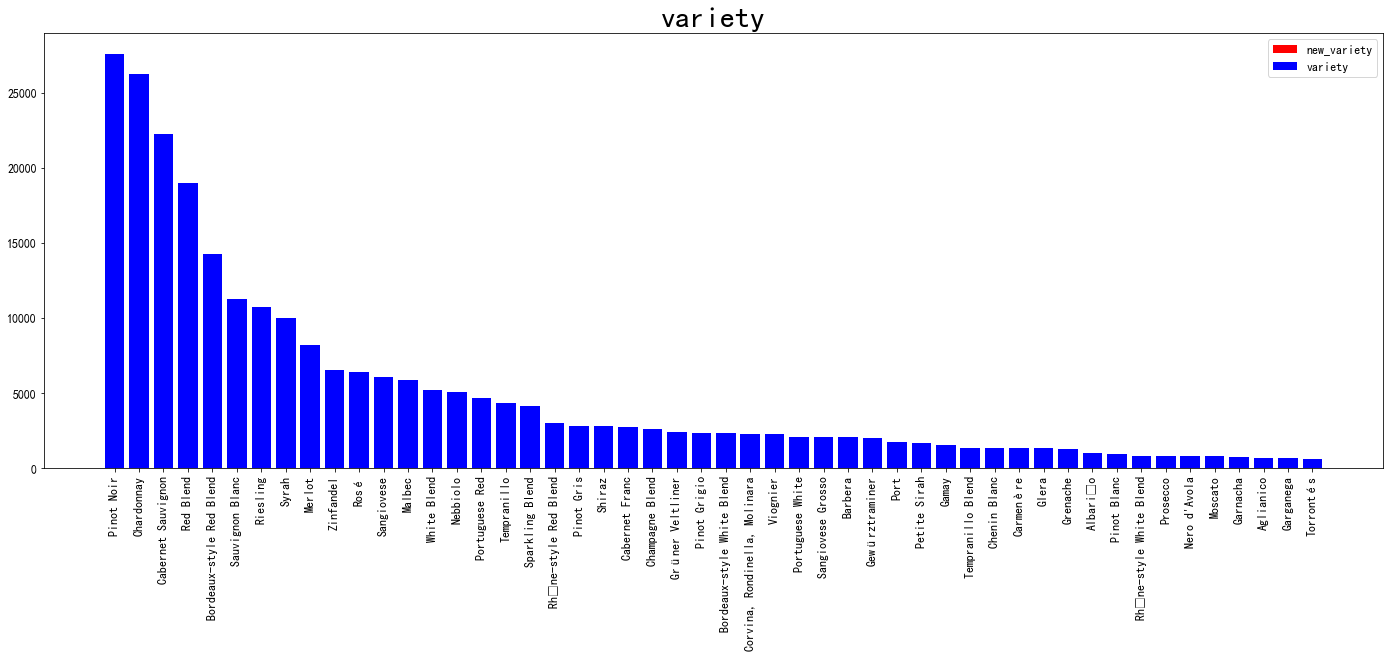

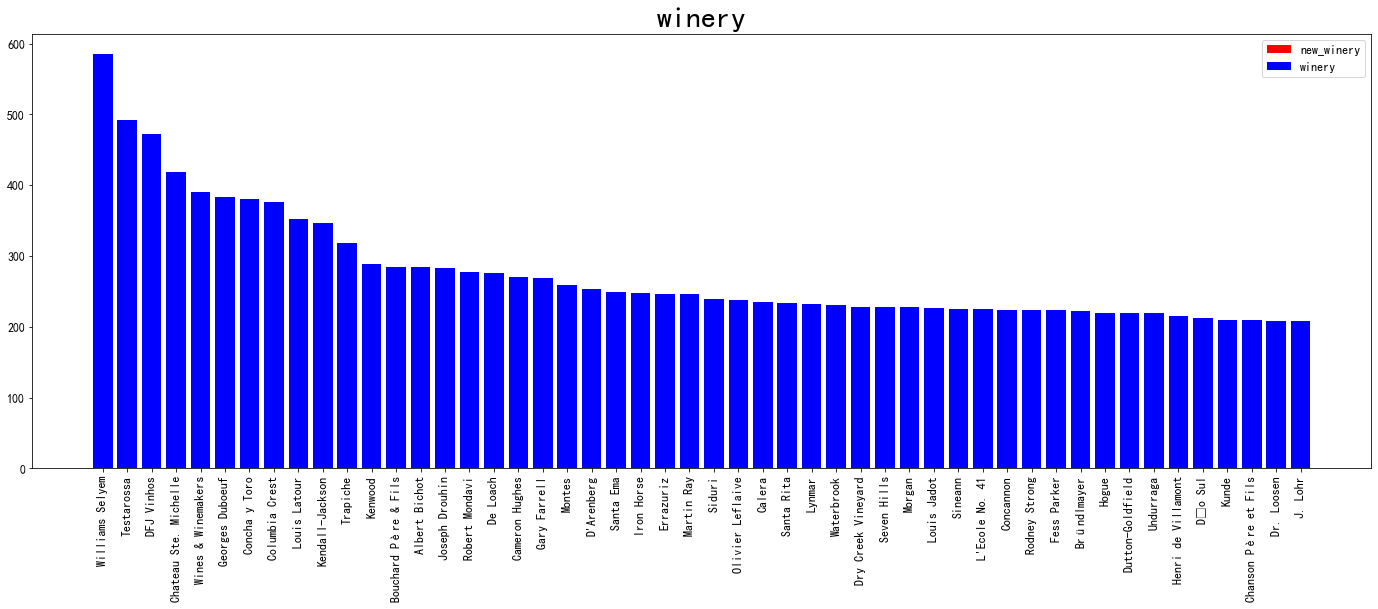

descriptive statistics (points):
Min: 80.0000	Q1(25%): 86.0000 	Q2(50%): 88.0000 	Q3(75%): 90.0000 	Max: 100.0000
Missing: 0

 new Min: 80.0000	Q1(25%): 86.0000 	Q2(50%): 88.0000 	Q3(75%): 90.0000 	Max: 100.0000 
 new Missing: 0 

descriptive statistics (price):
Min: 4.0000	Q1(25%): 16.0000 	Q2(50%): 25.0000 	Q3(75%): 40.0000 	Max: 3300.0000
Missing: 22691

 new Min: 4.0000	Q1(25%): 16.0000 	Q2(50%): 25.0000 	Q3(75%): 40.0000 	Max: 3300.0000 
 new Missing: 22639 



In [109]:
obj150k=obj_corr_fill(wine,numerical_index=numerical_index,k=10)

nominal_summary(wine,nominal_index=nominal_index,head_n=50,new_df=obj150k)
numerical_summary(wine,numerical_index=numerical_index,new_df=obj150k)

In [6]:
#奥克兰犯罪数据
#从文件中导入数据
crime = pd.DataFrame()
# 整合所有的数据
for i in range(2011, 2017):
    path = 'e:/wOlkand_data/records-for-' + str(i) + '.csv'
    crime_i = pd.read_csv(path)
    crime = pd.concat([crime_i, crime])
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046388 entries, 0 to 180015
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Agency                     1046384 non-null  object 
 1   Create Time                1046384 non-null  object 
 2   Location                   483425 non-null   object 
 3   Area Id                    864023 non-null   object 
 4   Beat                       1040583 non-null  object 
 5   Priority                   1046384 non-null  float64
 6   Incident Type Id           1046384 non-null  object 
 7   Incident Type Description  1045996 non-null  object 
 8   Event Number               1046384 non-null  object 
 9   Closed Time                1046359 non-null  object 
 10  Location 1                 374799 non-null   object 
 11  Zip Codes                  352 non-null      float64
 12  Location                   188052 non-null   object 
dtypes: float64(2)

In [114]:
crime.head()

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time,Location 1,Zip Codes,Location
0,OP,2016-01-01T00:00:57.000,ST&MARKET ST,P1,05X,2.0,415GS,415 GUNSHOTS,LOP160101000003,2016-01-01T00:32:30.000,NaN,NaN,NaN
1,OP,2016-01-01T00:01:25.000,AV&HAMILTON ST,P3,26Y,2.0,415GS,415 GUNSHOTS,LOP160101000005,2016-01-01T00:48:23.000,NaN,NaN,NaN
2,OP,2016-01-01T00:01:43.000,ST&CHESTNUT ST,P1,02X,2.0,415GS,415 GUNSHOTS,LOP160101000008,2016-01-01T00:21:24.000,NaN,NaN,NaN
3,OP,2016-01-01T00:01:48.000,WALLACE ST,P2,18Y,2.0,415GS,415 GUNSHOTS,LOP160101000007,2016-01-01T01:15:03.000,NaN,NaN,NaN
4,OP,2016-01-01T00:02:05.000,90TH AV,P3,34X,2.0,415GS,415 GUNSHOTS,LOP160101000009,2016-01-01T00:54:52.000,NaN,NaN,NaN


In [115]:
# 标称属性
#包括Location  Area Id Incident Type Id ,无数值属性
crime['Location'].value_counts()

 INTERNATIONAL BLVD           5851
 AV&INTERNATIONAL BLVD        4935
 MACARTHUR BLVD               4918
 BROADWAY                     3879
 INTERNATIONAL BLVD           3866
                              ... 
ALLENDALE 65TH AV                1
ALTAMONT 52ND AV                 1
MARTIN 36TH ST                   1
ALCATRAZ 54TH ST                 1
LAKESHORE HARRISON ST            1
Name: Location, Length: 83872, dtype: int64

In [116]:
#Area Id
crime['Area Id'].value_counts()

1.0    290452
2.0    236700
P3     129054
P1     114560
P2      53033
3.0     32907
POU      5960
PCW       789
5.0       320
4.0       236
TEC        10
WAG         1
JLS         1
Name: Area Id, dtype: int64

In [117]:
#Type Id
crime['Incident Type Id'].value_counts()

933R      98497
SECCK     70965
415       66720
911H      54935
10851     47958
          ...  
626_1         1
10750A        1
LKOUT         1
SUB           1
MTHLAB        1
Name: Incident Type Id, Length: 288, dtype: int64

In [118]:
crime['Priority'].value_counts()

2.0    814818
1.0    231542
0.0        24
Name: Priority, dtype: int64

In [119]:
crime.describe()

,Priority,Zip Codes
count,1.046384e+06,352.000000
mean,1.778676e+00,14049.377841
std,4.151937e-01,9658.498546
min,0.000000e+00,55.000000
25%,2.000000e+00,4560.000000
50%,2.000000e+00,13704.000000
75%,2.000000e+00,22280.000000
max,2.000000e+00,33120.000000


In [120]:
crime['Zip Codes'].value_counts()

4560.0     8
1481.0     5
14519.0    5
4380.0     4
17734.0    3
          ..
170.0      1
27323.0    1
7529.0     1
11342.0    1
26890.0    1
Name: Zip Codes, Length: 287, dtype: int64

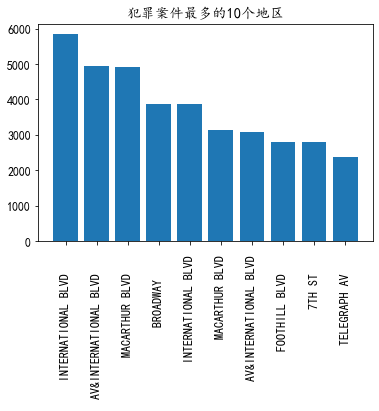

In [121]:
location = crime['Location'].value_counts()[:10]
location_10 = location.index
freq = [location[i] for i in range(10)]
plt.bar(location_10, freq)
plt.xticks(rotation=90)
plt.title('犯罪案件最多的10个地区')
plt.show()

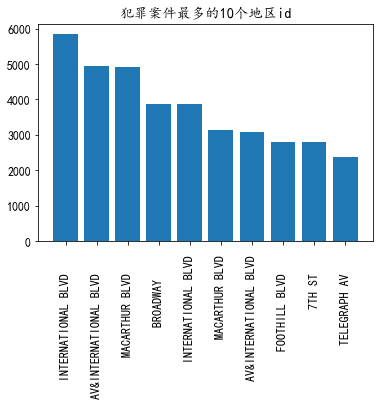

In [122]:
id = crime['Area Id'].value_counts()[:10]
id_10 = location.index
freq = [location[i] for i in range(10)]
plt.bar(id_10, freq)
plt.xticks(rotation=90)
plt.title('犯罪案件最多的10个地区id')
plt.show()

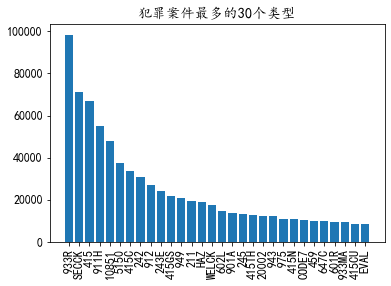

In [125]:
type_crime = crime['Incident Type Id'].value_counts()[:30]
id_30 = type_crime.index
freq = [type_crime[i] for i in range(30)]
plt.bar(id_30, freq)
plt.xticks(rotation=90)
plt.title('犯罪案件最多的30个类型')
plt.show()

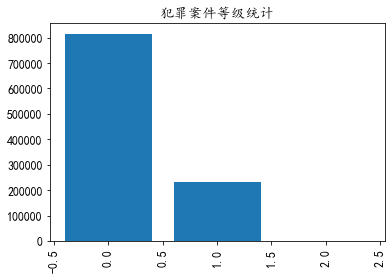

In [132]:
priority = crime['Priority'].value_counts()
priority_ = priority.index
freq = [priority[i] for i in range(3)]
plt.bar(priority_, freq)
plt.xticks(rotation=90)
plt.title('犯罪案件等级统计')
plt.show()

In [163]:
# 以location为例处理缺失数据
# 删除缺失数据
crime_location=crime.dropna(axis=0,inplace=False)


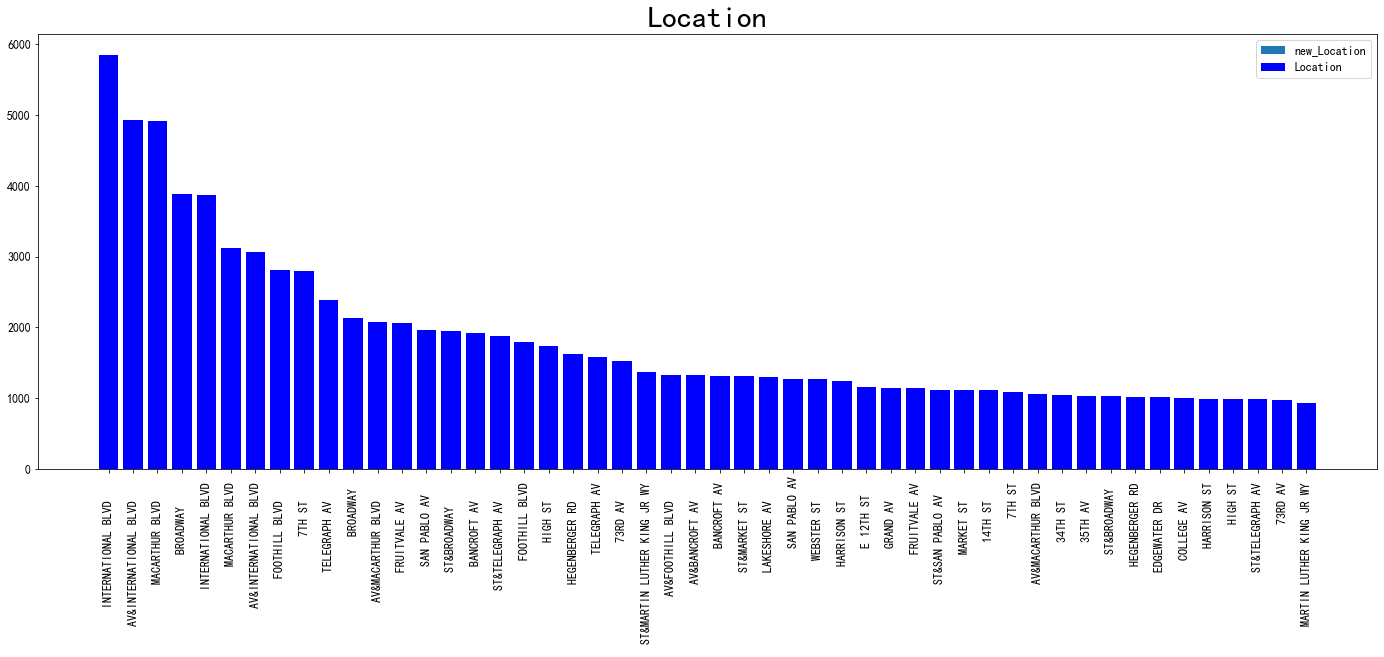

In [164]:
nominal_index = ['Location']
# Numerical index
#numerical_index = ['census_block_group','date_range_start', 'date_range_end','raw_visit_count','raw_visitor_count','distance_from_home']
nominal_summary(crime,nominal_index=nominal_index,head_n=50,new_df=crime_location)
#numerical_summary(crime,numerical_index=numerical_index,new_df=crime_location)


In [155]:
crime_location = crime
crime_location = crime['Location]'.fillna(crime['Location'].mode()[0])
crime_location.isnull().sum(axis=0)

0

In [158]:
def miss_mode_fill(df):
    cpdf = df.copy(deep=True)
    for key in cpdf.columns:
        cpdf[key].fillna(cpdf[key].mode()[0],inplace=True)
    return cpdf
crime_location = miss_mode_fill(crime)

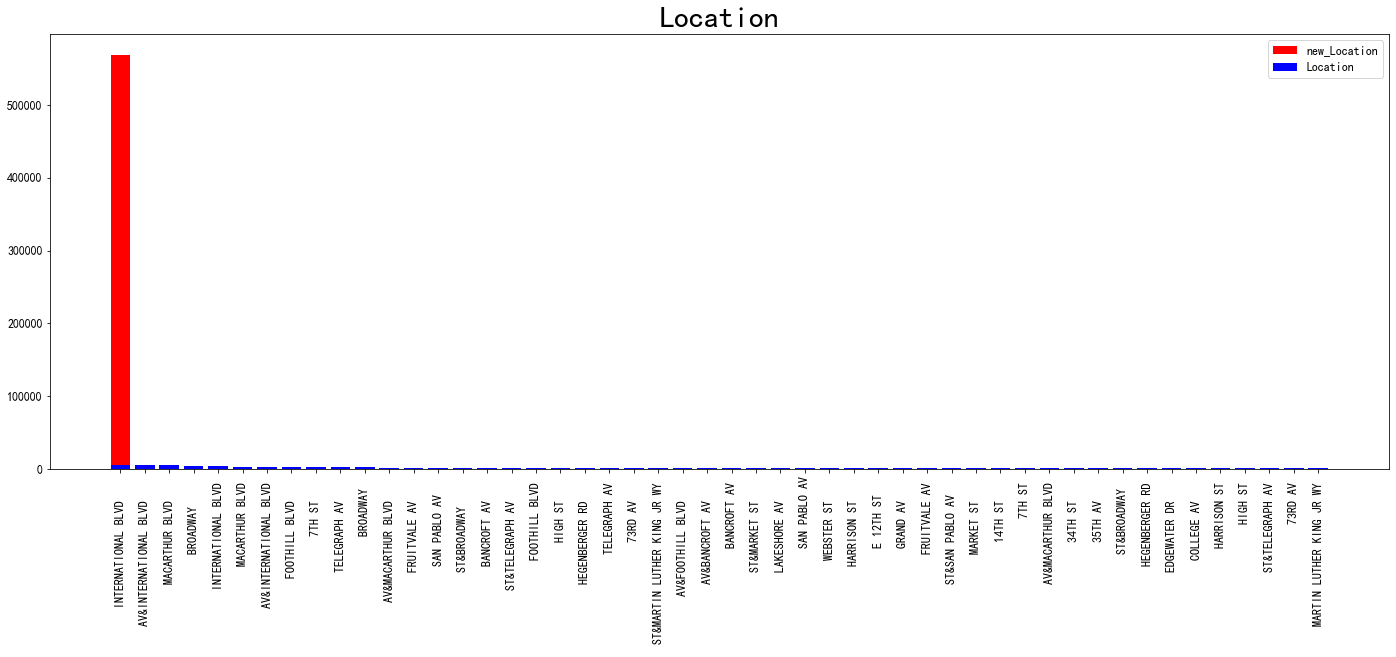

In [160]:
nominal_index = ['Location']
nominal_summary(crime,nominal_index=nominal_index,head_n=50,new_df=crime_location)


In [ ]:
nominal_index = ['Priority']
obj150k=obj_corr_fill(crime,numerical_index=nominal_index,k=10)
nominal_summary(crime,nominal_index=nominal_index,head_n=50,new_df=obj150k)

In [ ]:
#3.通过属性的相关关系来填补缺失值
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
def attr_corr_fill(df,miss_index,complete_index):
  def set_miss_values(df, complete_index):
    enc_label = OrdinalEncoder()
    enc_fea = OrdinalEncoder()
    missing_index = complete_index[0]
    
    # Take out the existing numerical data (no NaN) and throw them in Random Forest Regressor
    train_df = df[complete_index]
    # known & unknow values
    known_values = np.array(train_df[train_df[missing_index].notnull()])
    unknow_values = np.array(train_df[train_df[missing_index].isnull()])
    
    # y is the know missing_index
    y = known_values[:, 0].reshape(-1, 1)
    enc_label.fit(y)
    y = enc_label.transform(y)
    
    # X are the features
    X = known_values[:, 1:]
    test_X = unknow_values[:, 1:]
    all_X = np.row_stack((X,test_X))
    enc_fea.fit(all_X)
    X = enc_fea.transform(X)
    
    # fit
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y.ravel())
    # predict
    predicted_values = rfr.predict(enc_fea.transform(unknow_values[:, 1:]))
    predicted_values = enc_label.inverse_transform(predicted_values.reshape(-1, 1))
    # fill in with predicted values
    df.loc[ (df[missing_index].isnull()), missing_index] = predicted_values
    return df
  
  cpdf = df.copy(deep=True)
  for i in range(0,len(miss_index)):
    complete_index.insert(0,miss_index[i])
    cpdf = set_miss_values(cpdf,complete_index)
  return cpdf